# Data Visualization

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
import networkx as nx
import random

from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob
from textstat import flesch_reading_ease

In [2]:
df = pd.read_csv("data/guardian_environment_news.csv")
df.head()

,Title,Intro Text,Authors,Article Text,Date Published
0,Liz Truss ‘will approve more oil drilling if ...,Tory leadership candidate criticised by campai...,"['Rob Davies', '@ByRobDavies']",Liz Truss will sign off on a push for more oil...,2022-08-30
1,Renewed Highland golf course plan has environm...,Scottish government rejected a new links at Co...,"['Ewan Murray', '@mrewanmurray']",It is an area so tranquil that the notion of b...,2021-03-22
2,Visiting green spaces deters mental health dr...,Positive effects were stronger among those rep...,"['Damien Gayle', '@damiengayle']","Visits to parks, community gardens and other u...",2023-01-17
3,Bought too much red cabbage? Turn it into a fe...,This fantastic vegan centrepiece makes full us...,['Tom Hunt'],"I devised today’s nut roast for Oddbox, a veg ...",2023-12-22
4,‘This year has been very good’: readers’ UK bu...,Readers share their favourite sightings over t...,['Guardian readers'],‘Constant companions to our gardening’A peacoc...,2023-12-19


In [3]:
# Count for the Text Length and Word Count for Exploratory Data Analysis
# Fill the missing value to 0
df["Article Text"] = df["Article Text"].fillna("").astype(str)

df["Text_Length"] = df["Article Text"].apply(len)
df["Word_Count"] = df["Article Text"].apply(lambda x: len(x.split()))

In [4]:
# Convert to datetime format
df["Date Published"] = pd.to_datetime(df["Date Published"], format="%Y-%m-%d", errors="coerce")

# Drop rows with invalid dates
df = df.dropna(subset=["Date Published"])

# Extract year and month for analysis
df["Year"] = df["Date Published"].dt.year
df["Month"] = df["Date Published"].dt.month
df["Day"] = df["Date Published"].dt.day

Article Published over Year

C:\Users\User\AppData\Local\Temp\ipykernel_11488\2612539708.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.set_index("Date Published").resample("Y").size().plot(kind="line", marker="o", figsize=(10,5), title="Articles Published Over Year", color="royalblue")


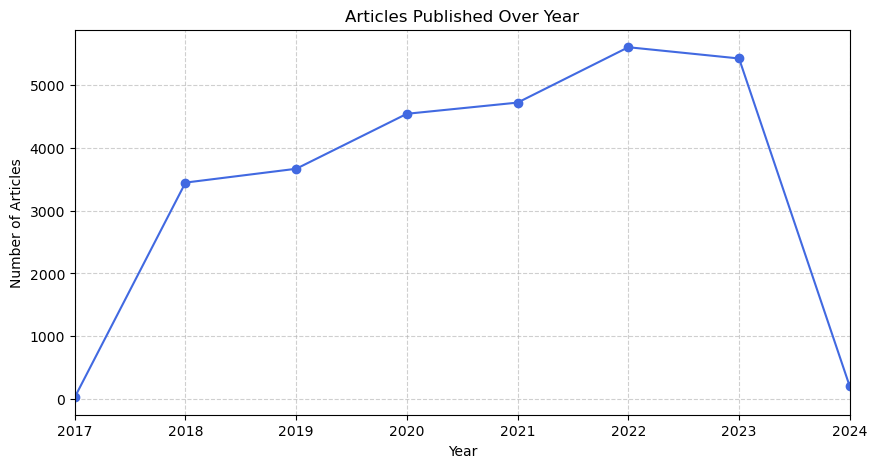

In [5]:
# Resample yearly and plot
df.set_index("Date Published").resample("Y").size().plot(kind="line", marker="o", figsize=(10,5), title="Articles Published Over Year", color="royalblue")

# Labels
plt.xlabel("Year")
plt.ylabel("Number of Articles")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Total Articles Published Per Month

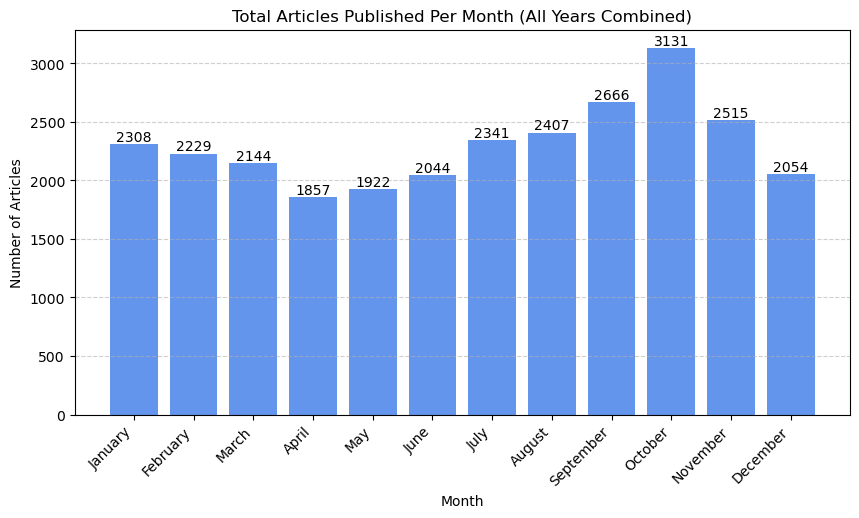

In [6]:
# Extract month name
df["Month"] = df["Date Published"].dt.month_name()

# Count articles per month
monthly_counts = df["Month"].value_counts()

# Order months correctly
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
monthly_counts = monthly_counts.reindex(month_order, fill_value=0)

# Plot bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(monthly_counts.index, monthly_counts.values, color="cornflowerblue")

# Add count labels on top of bars
for bar, count in zip(bars, monthly_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(count), ha="center", va="bottom", fontsize=10)

# Formatting
plt.xticks(rotation=45, ha="right")
plt.xlabel("Month")
plt.ylabel("Number of Articles")
plt.title("Total Articles Published Per Month (All Years Combined)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

Most Common Words

In [7]:
word_counts = Counter(" ".join(df["Article Text"]).split())
mostCommon = word_counts.most_common(20)

print(f"The 10 most common word counts is: {mostCommon}")

The 10 most common word counts is: [('the', 1228015), ('to', 648939), ('of', 629307), ('and', 584945), ('a', 452611), ('in', 416854), ('is', 238210), ('that', 221651), ('for', 208543), ('on', 175251), ('are', 140789), ('as', 131842), ('with', 126633), ('by', 126482), ('from', 114296), ('it', 114157), ('be', 114151), ('have', 113579), ('was', 108846), ('has', 97825)]


C:\Users\User\AppData\Local\Temp\ipykernel_11488\2676859807.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Word", data=common_df, palette="viridis")


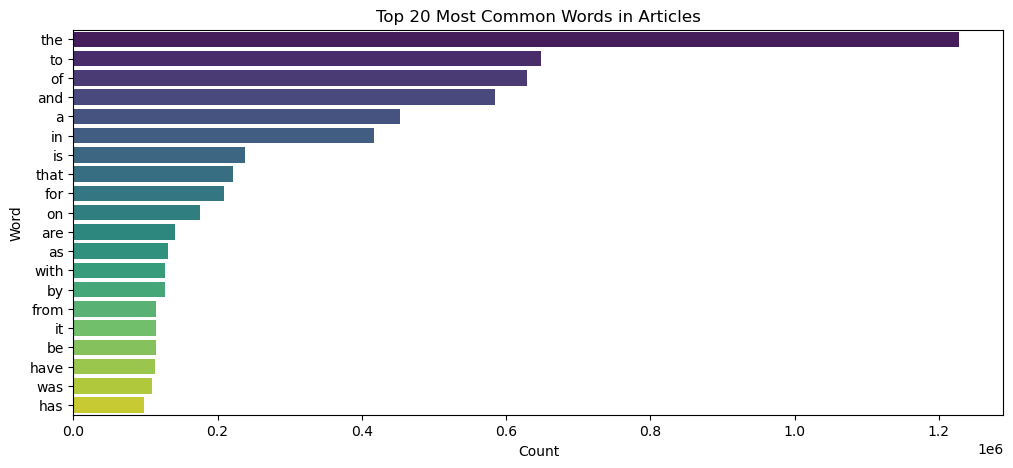

In [8]:
# Convert to DataFrame
common_df = pd.DataFrame(mostCommon, columns=["Word", "Count"])

# Plot
plt.figure(figsize=(12,5))
sns.barplot(x="Count", y="Word", data=common_df, palette="viridis")
plt.title("Top 20 Most Common Words in Articles")
plt.show()

Sentence Length Distribution

<Axes: xlabel='Text_Length', ylabel='Count'>

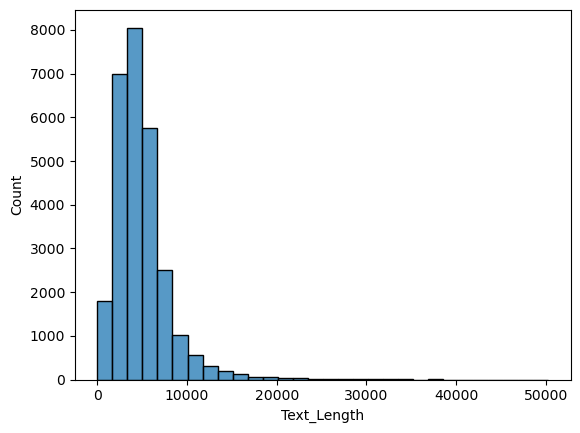

In [9]:
sns.histplot(df["Text_Length"], bins=30)

Sentiment Analysis

In [10]:
df["Sentiment"] = df["Article Text"].apply(lambda x: TextBlob(x).sentiment.polarity)
print(df[["Article Text", "Sentiment"]].head())

                                        Article Text  Sentiment
0  Liz Truss will sign off on a push for more oil...   0.049185
1  It is an area so tranquil that the notion of b...   0.113043
2  Visits to parks, community gardens and other u...  -0.035654
3  I devised today’s nut roast for Oddbox, a veg ...   0.145361
4  ‘Constant companions to our gardening’A peacoc...   0.157409


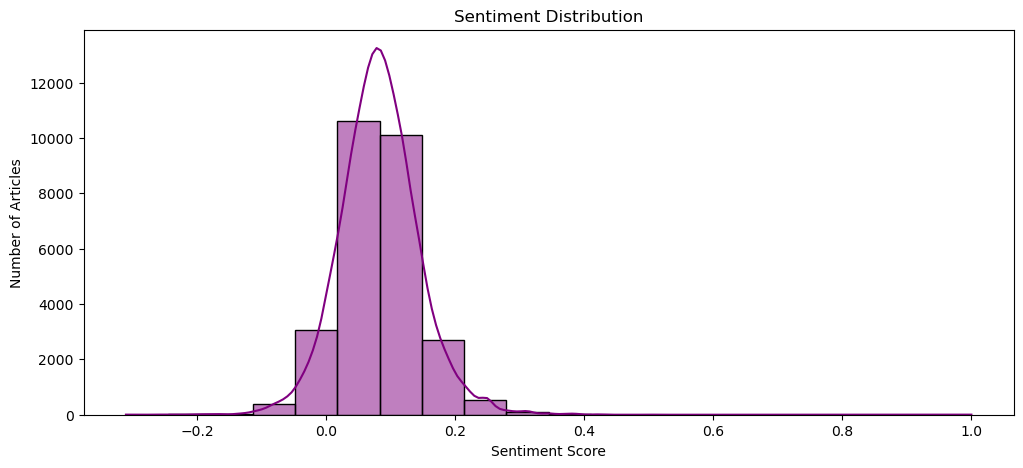

In [11]:
# Plot sentiment distribution
plt.figure(figsize=(12,5))
sns.histplot(df["Sentiment"], bins=20, kde=True, color="purple")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Articles")
plt.show()

Sentiment Over Time

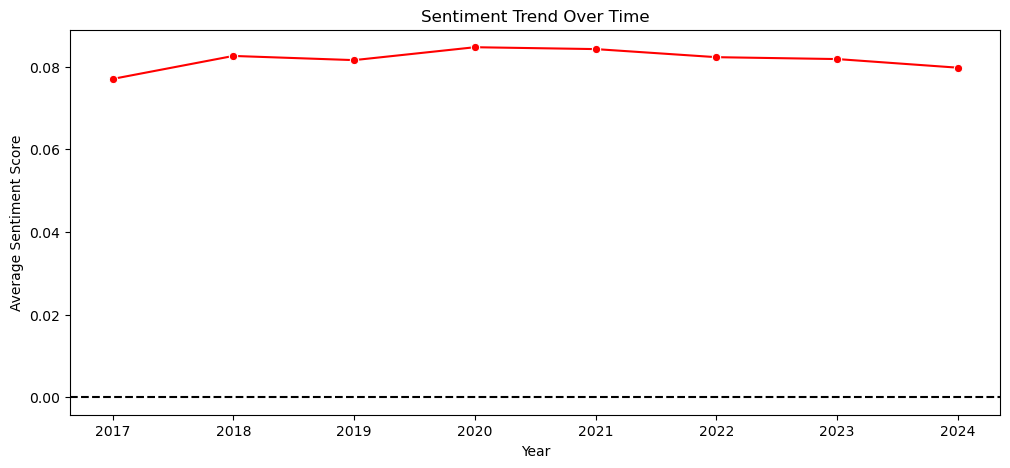

In [12]:
# Compute average sentiment per year
sentiment_trend = df.groupby("Year")["Sentiment"].mean()

# Plot sentiment trend
plt.figure(figsize=(12,5))
sns.lineplot(x=sentiment_trend.index, y=sentiment_trend.values, marker="o", color="red")
plt.axhline(0, linestyle="--", color="black")  # Neutral line
plt.title("Sentiment Trend Over Time")
plt.xlabel("Year")
plt.ylabel("Average Sentiment Score")
plt.show()

Text Analysis

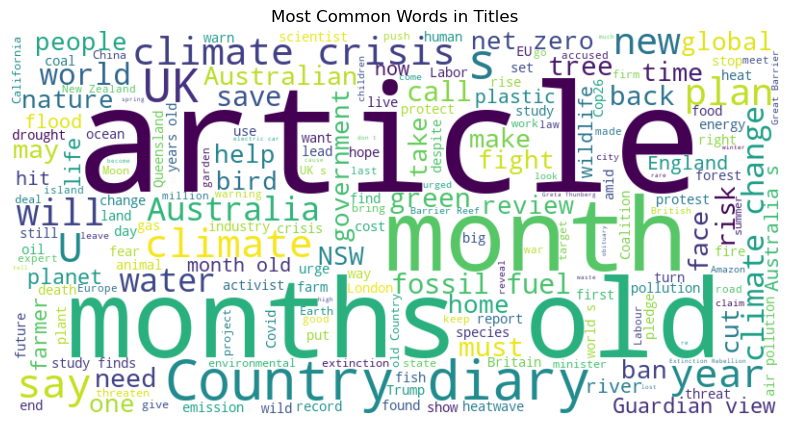

In [13]:
# Combine all text
text_data = " ".join(df["Title"].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text_data)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Titles")
plt.show()

Article Length vs Readability

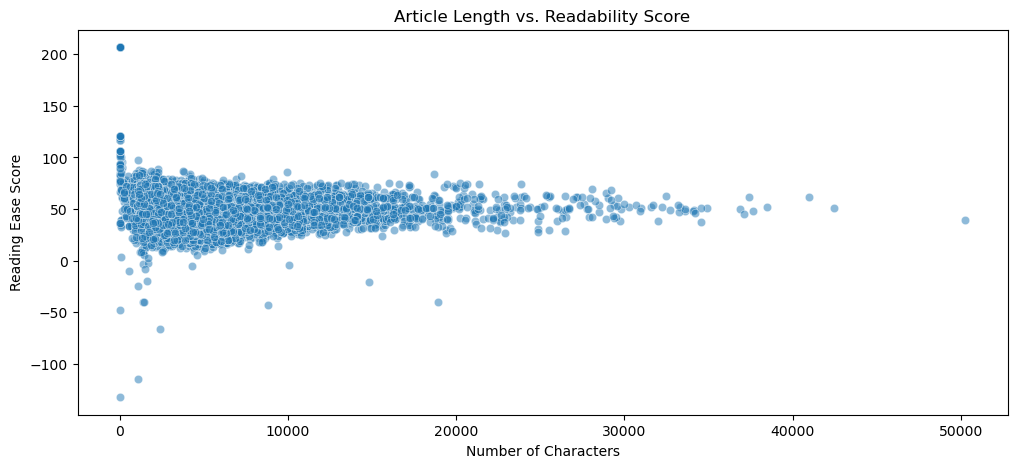

In [15]:
df["Reading Ease"] = df["Article Text"].dropna().astype(str).apply(flesch_reading_ease)

# Scatter plot
plt.figure(figsize=(12,5))
sns.scatterplot(x=df["Text Length"], y=df["Reading Ease"], alpha=0.5)
plt.title("Article Length vs. Readability Score")
plt.xlabel("Number of Characters")
plt.ylabel("Reading Ease Score")
plt.show()

Named Entity Recognition (NER)

In [16]:
# Load NLP model
nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    return [ent.text for ent in doc.ents if ent.label_ in ["ORG", "GPE", "PERSON"]]

df["Entities"] = df["Article Text"].dropna().astype(str).apply(extract_entities)

# Flatten list and count occurrences
all_entities = [ent for ents in df["Entities"] for ent in ents]
entity_counts = pd.Series(all_entities).value_counts().head(20)

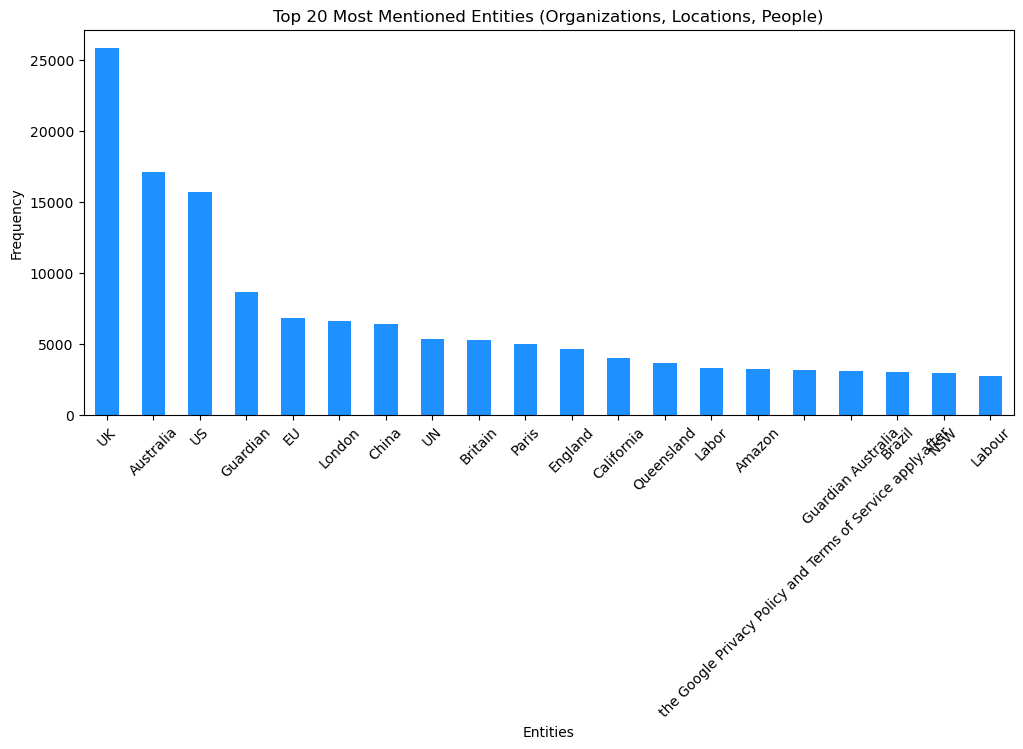

In [17]:
# Plot Top Entities
plt.figure(figsize=(12,5))
entity_counts.plot(kind="bar", color="dodgerblue")
plt.title("Top 20 Most Mentioned Entities (Organizations, Locations, People)")
plt.xlabel("Entities")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

Geospatial Analysis of News Coverage

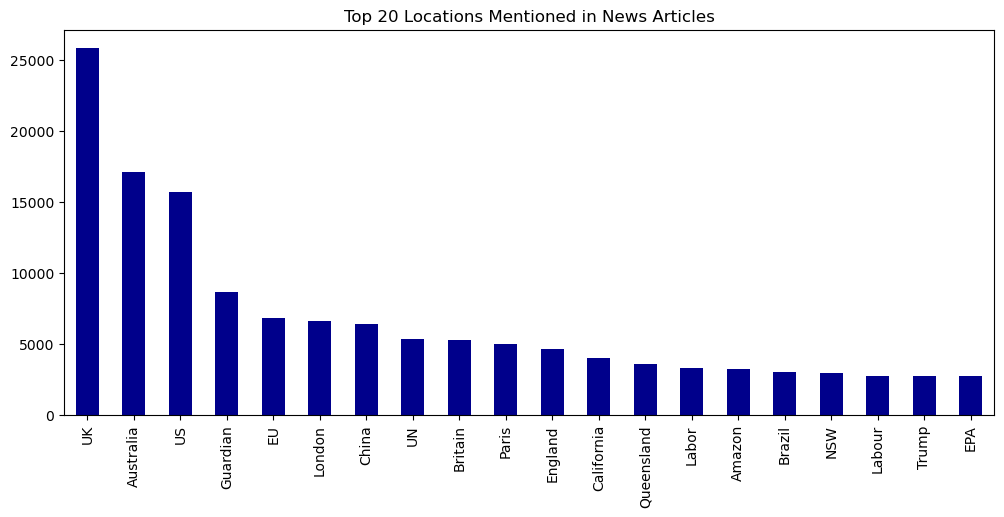

In [18]:
locations = [word for words in df["Entities"] for word in words if word.isalpha()]
location_counts = pd.Series(locations).value_counts().head(20)

plt.figure(figsize=(12,5))
location_counts.plot(kind="bar", color="darkblue")
plt.title("Top 20 Locations Mentioned in News Articles")
plt.show()